In [2]:
from annette.graph import AnnetteGraph
from annette.estimation import layers 
from pathlib import Path
import annette.utils as utils
from annette.generation.layergen import LayerModelGen 
from annette.generation.mappinggen import MappingModelGen 

In [8]:
import numpy as np
import pandas as pd
import pickle as pkl
import os

In [9]:
convpool = MappingModelGen(name="ConvPool", prim_type="Conv", sec_type="Pool", out_type="ConvPool")

In [10]:
convpool.read_data("../database/benchmarks/ncs2/conv2d_pool2.p")
print(len(convpool.data))
print(convpool.data)

Importing File: ../database/benchmarks/ncs2/conv2d_pool2.p
Data imported...
29354
      width height channels filters k_height k_width k_stride pool_h pool_w  \
0         8      8        3       3        1       1        1      0      0   
1         8      8        3       3        3       3        1      2      2   
2         8      8        3       3        5       5        1      0      0   
3         8      8        3       3        7       7        1      0      0   
4         8     12        3       3        1       1        1      0      0   
...     ...    ...      ...     ...      ...     ...      ...    ...    ...   
29349    32     16      384     512        1       1        1      0      0   
29350    32     16      384     512        3       3        1      2      2   
29351    32     16      384     512        5       5        1      0      0   
29352    32     16      384     512        7       7        1      0      0   
29353    32     24      384     512        1     

In [11]:
data = convpool.data
data['num_ops'] = data['k_height']*data['k_width']*data['height']*data['width']*data['channels']*data['filters']*2
data['num_inputs'] = data['height']*data['width']*data['channels']
data['num_outputs'] = data['height']*data['width']*data['filters']
data['num_weights'] = data['k_height']*data['k_width']*data['filters']*data['channels']
data['ops/s'] = data['num_ops']/(data['time(ms)']/1e3)

In [12]:
est_dict = {'0': 'num_ops',
    '1': 'num_inputs',
    '2': 'num_outputs',
    '3': 'height',
    '4': 'width',
    '5': 'channels',
    '6': 'filters',
    '7': 'k_height',
    '8': 'k_width',
    '9': 'num_weights'}
fuse_cond = {
        "primary": {
        },
        "secondary": {
            "1": {
                "name": "kernel_shape",
                "i": 1,
                "cond": "==",
                "val": "2"
            },
            "2": {
                "name": "kernel_shape",
                "i": 2,
                "cond": "==",
                "val": "2"
            },
            "3": {
                "name": "pooling_type",
                "cond": "==",
                "val": "MAX"
            }
        }
    }

print(base.generate_estimator(est_dict = est_dict, y_val = "f_pool"))

base.name = "ConvPool"
base.gen_dict()
base.trans_Conv()
#base.store_model("./database/ncs2_opt/convpool.sav")
base.add_fuse_condition(fuse_cond)
base.desc

{'0': 'num_ops', '1': 'num_inputs', '2': 'num_outputs', '3': 'height', '4': 'width', '5': 'channels', '6': 'filters', '7': 'k_height', '8': 'k_width', '9': 'num_weights'}
[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2217
         1.0       1.00      1.00      1.00       719

    accuracy                           1.00      2936
   macro avg       1.00      1.00      1.00      2936
weighted avg       1.00      1.00      1.00      2936

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19902
         1.0       1.00      1.00      1.00      6516

    accuracy                           1.00     26418
   macro avg       1.00      1.00      1.00     26418
weighted avg       1.00      1.00      1.00     26418

Mean Absolute Error: 0.0
R2 Score: 1.0
Estimator not stored!

(array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
      

{'conv_dict': {'0': {'name': 'num_ops', 'layer': 'primary'},
  '1': {'name': 'num_inputs', 'layer': 'primary'},
  '2': {'name': 'num_outputs', 'layer': 'primary'},
  '3': {'name': 'input_shape', 'i': 1, 'layer': 'primary'},
  '4': {'name': 'input_shape', 'i': 2, 'layer': 'primary'},
  '5': {'name': 'input_shape', 'i': 3, 'layer': 'primary'},
  '6': {'name': 'output_shape', 'i': 3, 'layer': 'primary'},
  '7': {'name': 'kernel_shape', 'i': 0, 'layer': 'primary'},
  '8': {'name': 'kernel_shape', 'i': 1, 'layer': 'primary'},
  '9': {'name': 'num_weights', 'layer': 'primary'}},
 'name': 'ConvPool',
 'prim_type': 'Conv',
 'sec_type': 'Pool',
 'out_type': 'ConvPool',
 'fuse_cond': {'primary': {},
  'secondary': {'1': {'name': 'kernel_shape',
    'i': 1,
    'cond': '==',
    'val': '2'},
   '2': {'name': 'kernel_shape', 'i': 2, 'cond': '==', 'val': '2'},
   '3': {'name': 'pooling_type', 'cond': '==', 'val': 'MAX'}}}}

[Text(502.20000000000005, 489.24, 'X[7] <= 4.0\ngini = 0.372\nsamples = 26418\nvalue = [19902, 6516]\nclass = fused'),
 Text(334.8, 380.52000000000004, 'X[8] <= 2.0\ngini = 0.5\nsamples = 13299\nvalue = [6783, 6516]\nclass = fused'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 6667\nvalue = [6667, 0]\nclass = fused'),
 Text(502.20000000000005, 271.8, 'X[4] <= 640.0\ngini = 0.034\nsamples = 6632\nvalue = [116, 6516]\nclass = not fused'),
 Text(334.8, 163.08000000000004, 'X[3] <= 896.0\ngini = 0.005\nsamples = 6532\nvalue = [16, 6516]\nclass = not fused'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 6516\nvalue = [0, 6516]\nclass = not fused'),
 Text(502.20000000000005, 54.360000000000014, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = fused'),
 Text(669.6, 163.08000000000004, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]\nclass = fused'),
 Text(669.6, 380.52000000000004, 'gini = 0.0\nsamples = 13119\nvalue = [13119, 0]\nclass = fused')]

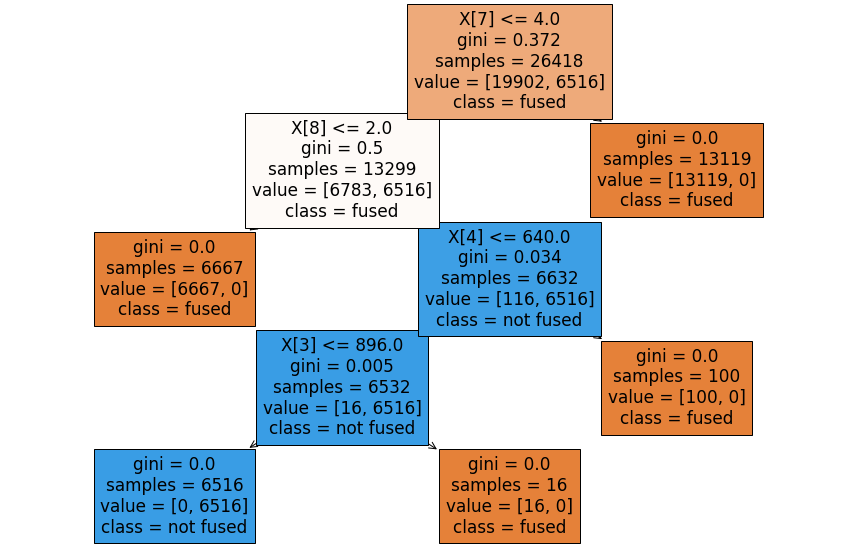

In [15]:
import matplotlib.pyplot as plt  
from sklearn import tree
fig, ax = plt.subplots(figsize=(15,10))# whatever size you want
tree.plot_tree(base.classifier, class_names=['fused','not fused'], filled=True, max_depth=10, impurity=True, ax=ax)
      

In [22]:
relu = MappingModelGen("ConvRelu", "Conv", "Relu", "Conv")
folder_in = 'database/benchmarks/ncs2/'
relu.read_data("database/benchmarks/ncs2/conv2d_square.p")
relu.read_data("database/benchmarks/ncs2/conv2d_height.p")
relu.read_data("database/benchmarks/ncs2/conv2d_width.p")
data = relu.data
data['num_ops'] = data['k_height']*data['k_width']*data['height']*data['width']*data['channels']*data['filters']*2
data['num_inputs'] = data['height']*data['width']*data['channels']
data['num_outputs'] = data['height']*data['width']*data['filters']
data['num_weights'] = data['k_height']*data['k_width']*data['filters']*data['channels']
data['ops/s'] = data['num_ops']/(data['time(ms)']/1e3)

est_dict = {'0': 'num_ops',
    '1': 'num_inputs',
    '2': 'num_outputs',
    '3': 'height',
    '4': 'width',
    '5': 'channels',
    '6': 'filters',
    '7': 'k_height',
    '8': 'k_width',
    '9': 'num_weights'}
print(relu.generate_estimator(est_dict = est_dict, y_val = "f_act"))

relu.name = "ConvRelu"
relu.trans_Conv()
relu.store_model("./database/ncs2_opt/convrelu.sav")
relu.gen_dict()
relu.desc

Importing File: database/benchmarks/ncs2/conv2d_square.p
Data imported...
Importing File: database/benchmarks/ncs2/conv2d_height.p
Append imported Data...
Importing File: database/benchmarks/ncs2/conv2d_width.p
Append imported Data...
{'0': 'num_ops', '1': 'num_inputs', '2': 'num_outputs', '3': 'height', '4': 'width', '5': 'channels', '6': 'filters', '7': 'k_height', '8': 'k_width', '9': 'num_weights'}
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      8739

    accuracy                           1.00      8739
   macro avg       1.00      1.00      1.00      8739
weighted avg       1.00      1.00      1.00      8739

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     78647

    accuracy                           1.00     78647
   macro avg       1.00      1.00      1.00     78647
weighted avg       1.00      1.00      1.00     78647

Mean A

{'conv_dict': {'0': {'name': 'num_ops', 'layer': 'primary'},
  '1': {'name': 'num_inputs', 'layer': 'primary'},
  '2': {'name': 'num_outputs', 'layer': 'primary'},
  '3': {'name': 'input_shape', 'i': 1, 'layer': 'primary'},
  '4': {'name': 'input_shape', 'i': 2, 'layer': 'primary'},
  '5': {'name': 'input_shape', 'i': 3, 'layer': 'primary'},
  '6': {'name': 'output_shape', 'i': 3, 'layer': 'primary'},
  '7': {'name': 'kernel_shape', 'i': 0, 'layer': 'primary'},
  '8': {'name': 'kernel_shape', 'i': 1, 'layer': 'primary'},
  '9': {'name': 'num_weights', 'layer': 'primary'}},
 'name': 'ConvRelu',
 'prim_type': 'Conv',
 'sec_type': 'Relu',
 'out_type': 'Conv',
 'est_model': './database/ncs2_opt/convrelu.sav'}

In [19]:
add = MappingModelGen("ConvAdd", "Conv", "Add", "ConvAdd")
folder_in = 'database/benchmarks/ncs2/'
add.read_data("database/benchmarks/ncs2/conv2d_square.p")
add.read_data("database/benchmarks/ncs2/conv2d_height.p")
add.read_data("database/benchmarks/ncs2/conv2d_width.p")
data = add.data
data['num_ops'] = data['k_height']*data['k_width']*data['height']*data['width']*data['channels']*data['filters']*2
data['num_inputs'] = data['height']*data['width']*data['channels']
data['num_outputs'] = data['height']*data['width']*data['filters']
data['num_weights'] = data['k_height']*data['k_width']*data['filters']*data['channels']
data['ops/s'] = data['num_ops']/(data['time(ms)']/1e3)

est_dict = {'0': 'num_ops',
    '1': 'num_inputs',
    '2': 'num_outputs',
    '3': 'height',
    '4': 'width',
    '5': 'channels',
    '6': 'filters',
    '7': 'k_height',
    '8': 'k_width',
    '9': 'num_weights'}
print(add.generate_estimator(est_dict = est_dict, y_val = "f_add"))

add.name = "ConvAdd"
add.gen_dict()
add.trans_Conv()
add.store_model("./database/ncs2_opt/convadd.sav")
add.add_fuse_condition(fuse_cond)
add.desc

Importing File: database/benchmarks/ncs2/conv2d_square.p
Data imported...
Importing File: database/benchmarks/ncs2/conv2d_height.p
Append imported Data...
Importing File: database/benchmarks/ncs2/conv2d_width.p
Append imported Data...
{'0': 'num_ops', '1': 'num_inputs', '2': 'num_outputs', '3': 'height', '4': 'width', '5': 'channels', '6': 'filters', '7': 'k_height', '8': 'k_width', '9': 'num_weights'}
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      6093
         1.0       0.84      0.98      0.91      2646

    accuracy                           0.94      8739
   macro avg       0.92      0.95      0.93      8739
weighted avg       0.95      0.94      0.94      8739

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     55161
         1.0       0.84      0.98      0.91     23486

    accuracy                           0.94     78647
   macr

{'conv_dict': {'0': {'name': 'num_ops', 'layer': 'primary'},
  '1': {'name': 'num_inputs', 'layer': 'primary'},
  '2': {'name': 'num_outputs', 'layer': 'primary'},
  '3': {'name': 'input_shape', 'i': 1, 'layer': 'primary'},
  '4': {'name': 'input_shape', 'i': 2, 'layer': 'primary'},
  '5': {'name': 'input_shape', 'i': 3, 'layer': 'primary'},
  '6': {'name': 'output_shape', 'i': 3, 'layer': 'primary'},
  '7': {'name': 'kernel_shape', 'i': 0, 'layer': 'primary'},
  '8': {'name': 'kernel_shape', 'i': 1, 'layer': 'primary'},
  '9': {'name': 'num_weights', 'layer': 'primary'}},
 'name': 'ConvAdd',
 'prim_type': 'Conv',
 'sec_type': 'Add',
 'out_type': 'ConvAdd',
 'fuse_cond': {'primary': {},
  'secondary': {'1': {'name': 'kernel_shape',
    'i': 1,
    'cond': '==',
    'val': '2'},
   '2': {'name': 'kernel_shape', 'i': 2, 'cond': '==', 'val': '2'},
   '3': {'name': 'pooling_type', 'cond': '==', 'val': 'MAX'}}},
 'est_model': './database/ncs2_opt/convadd.sav'}